Sentiment analysis in product reviews

You will implement a model to classify movie reviews (predict and label the movie reviews as "positive" or "negative").

Import the necessary libraries and print the version of TensorFlow API:

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

2.14.0


## Import the IMDB dataset

We'll use the [IMDB dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb) which contains the text of 50,000 movie reviews. We will use 25,000 reviews for training and 25,000 reviews for testing. The training and testing sets contain an equal number of positive and negative reviews (i.e., they are *balanced*).

For illustration, a piece of a negative review with 2 stars is as follows:

>>> *"Now, I LOVE Italian horror films. The cheesier they are, the better. However, this is not cheesy Italian. This is week-old spaghetti sauce with rotting meatballs. It is amateur hour on every level. There is no suspense, no horror, with just a few drops of blood scattered around to remind you that you are in fact watching a horror film."*
<table>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://www.imdb.com/review/rw1795788/">Sample review</a> (for the movie "Don't Look in the Attic").<br/>&nbsp;
  </td></tr>
</table>

Import and load the data from TensorFow (the data is already split into test and training sets, and words are converted to integers):


In [ ]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


Note the argument `num_words=10000` keeps the top 10,000 most frequently occurring words to keep the size of the data manageable.

## Explore the data

Explore the format of the **training** dataset (25,000 reviews with each review is represented as an array of integers):

In [ ]:
print(train_data.shape)
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

(25000,)
Training entries: 25000, labels: 25000


Explore the labels of the **training** dataset (each label is either 0 (negative) or 1 (positive)):

In [ ]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

Display the 1st review in the **training** dataset (reviews are converted to integers and each integer represents a specific word):

In [ ]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Display the number of words in the first five reviews (needs processing, because inputs to a neural network must be the same length):

In [ ]:
for i in range(0,5):
  print(len(train_data[i]))

218
189
141
550
147


## Prepare the data

Standardize the length of movie reviews by using the [pad_sequences](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences) function:

In [ ]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

1641221/1641221 [==============================] - 0s 0us/step


Display the number of words in the first five reviews to confirm the padding:

In [ ]:
for i in range(0,5):
  print(len(train_data[i]))

256
256
256
256
256


Inspect the (now padded) first review:

In [ ]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

## Build the model

The neural network is created by stacking layers—this requires two main architectural decisions:

* How many layers to use in the model?
* How many *hidden units* to use for each layer?

In this example, the input data consists of an array of word-indices. The labels to predict are either 0 or 1. Let's build a model for this problem:

In [ ]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential([
    keras.layers.Embedding(vocab_size, 16, input_length=256), #This layer takes the integer-encoded vocabulary and looks up the embedding vector for each word-index.
    keras.layers.GlobalAveragePooling1D(), #This layer returns a fixed-length output vector for each example by averaging over the sequence dimension. reduce the dimension to 16
    keras.layers.Dense(16, activation=tf.nn.relu), #This layer is a 16-unit (or neuron) ReLU layer. This is the first learning layer.
    keras.layers.Dense(1, activation=tf.nn.sigmoid) #This layer is a single-unit (or neuron) Sigmoid layer. This is the second learning layer.
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 256, 16)           160000    
                                                                 
 global_average_pooling1d_1  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160289 (626.13 KB)
Trainable params: 160289 (626.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



### Compile the model

Define the loss function, optimizer, and performance metric using the model's *compile* step:

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

## Create a validation set

Create a *validation set* by setting apart 10,000 examples from the training data. (the validation set will be used to tune our model).

In [ ]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

## Train the model

Train the model for 5 epochs using the images and their labels in the training set:

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/5
30/30 [==============================] - 3s 53ms/step - loss: 0.6912 - accuracy: 0.5247 - val_loss: 0.6888 - val_accuracy: 0.5779
Epoch 2/5
30/30 [==============================] - 1s 31ms/step - loss: 0.6847 - accuracy: 0.6725 - val_loss: 0.6810 - val_accuracy: 0.6907
Epoch 3/5
30/30 [==============================] - 1s 26ms/step - loss: 0.6735 - accuracy: 0.7188 - val_loss: 0.6681 - val_accuracy: 0.7273
Epoch 4/5
30/30 [==============================] - 1s 27ms/step - loss: 0.6562 - accuracy: 0.7471 - val_loss: 0.6492 - val_accuracy: 0.7563
Epoch 5/5
30/30 [==============================] - 1s 27ms/step - loss: 0.6326 - accuracy: 0.7789 - val_loss: 0.6251 - val_accuracy: 0.7743


## Evaluate the model

Evaluate the accuracy of the model by making predictions using the model in the test dataset:

In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

print('Test accuracy:', test_acc)

782/782 [==============================] - 2s 2ms/step - loss: 0.6259 - accuracy: 0.7665
Test accuracy: 0.766480028629303


## Plot the accuracy and loss of the model

Plot both the accuracy and loss over time (as the number of epochs increase):

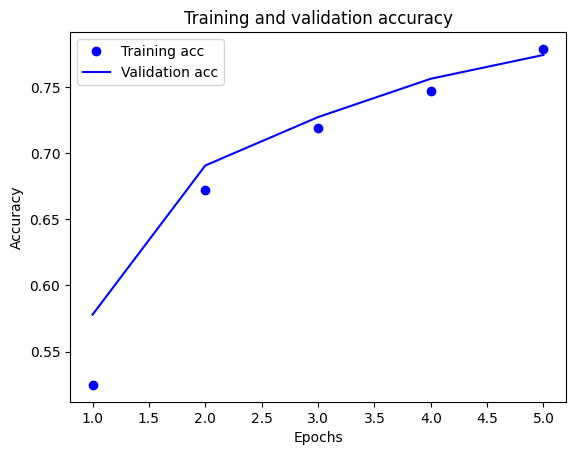

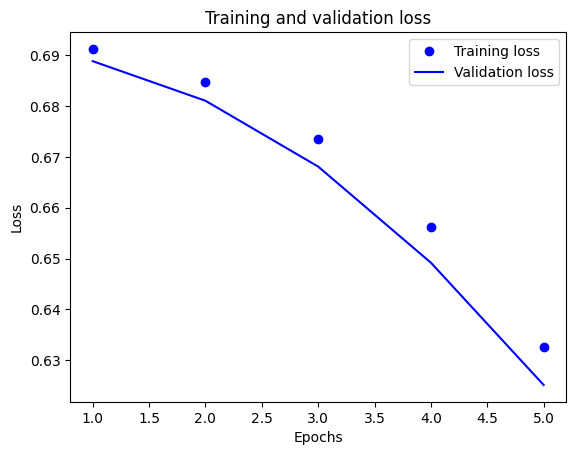

In [ ]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

plt.clf()   # clear figure
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

---

# Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.